In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tqdm import tqdm
import glob
import seaborn as sns
import cv2
import io

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import ipywidgets as widgets
from tensorflow.keras.utils import to_categorical

# architecture Pare
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
labels = ["broadleaf", "grass", "soil", "soybean"]

In [3]:
X  =[] 
Y = [] 
image_size = (227, 227)

for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))
    
    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
1191
../input/weed-detection-in-soybean-crops/dataset/grass/
3520
../input/weed-detection-in-soybean-crops/dataset/soil/
3249
../input/weed-detection-in-soybean-crops/dataset/soybean/
7376


In [4]:
for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])
#     break

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
../input/weed-detection-in-soybean-crops/dataset/broadleaf/274.tif
../input/weed-detection-in-soybean-crops/dataset/grass/
../input/weed-detection-in-soybean-crops/dataset/grass/659.tif
../input/weed-detection-in-soybean-crops/dataset/soil/
../input/weed-detection-in-soybean-crops/dataset/soil/659.tif
../input/weed-detection-in-soybean-crops/dataset/soybean/
../input/weed-detection-in-soybean-crops/dataset/soybean/5623.tif


In [5]:
X.shape, Y.shape

((15336, 227, 227, 3), (15336,))

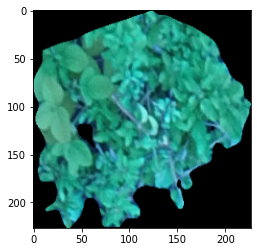

In [6]:
plt.imshow(X[0])

In [7]:
print(Y[0])

broadleaf


In [8]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [9]:
Y.shape

(15336, 4)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [11]:
X_train.shape, Y_train.shape

((10735, 227, 227, 3), (10735, 4))

In [12]:
X_test.shape, Y_test.shape

((4601, 227, 227, 3), (4601, 4))

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [14]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load EfficientNetB0 pre-trained on ImageNet data
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Create a Sequential model
model = Sequential()

# Add EfficientNetB0 layers to the model
model.add(efficientnet_model)

# Flatten layer
model.add(Flatten())

# Add Dense layers for classification
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(4, activation='softmax'))


16719872/16705208 [==============================] - 2s 0us/step


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 8, 8, 1280)        4049571   
_________________________________________________________________
flatten (Flatten)            (None, 81920)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              335548416 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16388     
Total params: 356,395,687
Trainable params: 356,353,664
Non-trainable params: 42,023
_________________________________________________________________


In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [17]:
model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [18]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10, batch_size = 2, verbose = 1)

Epoch 1/10
5368/5368 [==============================] - 445s 80ms/step - loss: 0.3003 - accuracy: 0.8917 - val_loss: 0.1810 - val_accuracy: 0.9346
Epoch 2/10
5368/5368 [==============================] - 425s 79ms/step - loss: 0.0753 - accuracy: 0.9755 - val_loss: 0.3431 - val_accuracy: 0.9015
Epoch 3/10
5368/5368 [==============================] - 426s 79ms/step - loss: 0.0470 - accuracy: 0.9866 - val_loss: 0.1612 - val_accuracy: 0.9613
Epoch 4/10
5368/5368 [==============================] - 427s 80ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.1281 - val_accuracy: 0.9717
Epoch 5/10
5368/5368 [==============================] - 425s 79ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.2487 - val_accuracy: 0.9500
Epoch 6/10
5368/5368 [==============================] - 424s 79ms/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 0.2728 - val_accuracy: 0.9515
Epoch 7/10
5368/5368 [==============================] - 423s 79ms/step - loss: 0.0210 - accuracy: 0.9952 - val_loss: 0

Model Accuracy



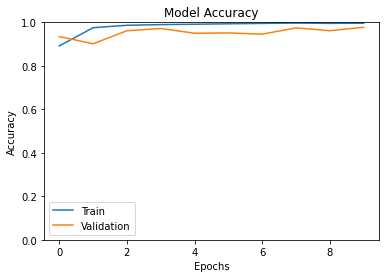

In [19]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



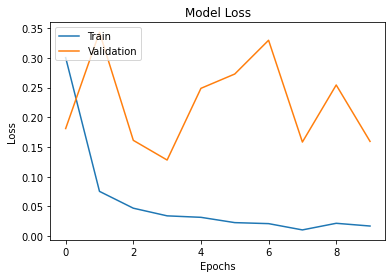

In [20]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
model.save('Efficientnet_model.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
